In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
# Plotly for interactive graphics 
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [23]:
tdf = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv').sample(10000)
tdf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
69071,2013-11-12,Melbourne,12.4,15.9,1.0,3.8,0.3,SE,48.0,SE,...,68.0,81.0,1017.7,1015.1,7.0,8.0,14.9,14.8,No,Yes
98101,2013-08-14,Adelaide,11.4,14.8,5.0,2.2,6.7,SW,56.0,WNW,...,94.0,50.0,1010.8,1015.5,NaN,NaN,12.0,14.5,Yes,No
53616,2013-06-01,MountGinini,5.7,6.3,13.4,NaN,NaN,NW,70.0,NW,...,96.0,96.0,NaN,NaN,NaN,NaN,5.9,6.2,Yes,Yes
19343,2012-06-12,NorahHead,13.7,19.0,18.6,NaN,NaN,SSE,59.0,SSE,...,67.0,73.0,1019.3,1017.5,NaN,NaN,17.3,17.1,Yes,Yes
112269,2010-10-21,Witchcliffe,8.5,17.0,10.6,NaN,NaN,SSE,28.0,SSE,...,62.0,65.0,1020.3,1019.7,NaN,NaN,14.5,16.2,Yes,No


In [24]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 69071 to 87275
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10000 non-null  object 
 1   Location       10000 non-null  object 
 2   MinTemp        9909 non-null   float64
 3   MaxTemp        9914 non-null   float64
 4   Rainfall       9808 non-null   float64
 5   Evaporation    5635 non-null   float64
 6   Sunshine       5121 non-null   float64
 7   WindGustDir    9247 non-null   object 
 8   WindGustSpeed  9253 non-null   float64
 9   WindDir9am     9280 non-null   object 
 10  WindDir3pm     9727 non-null   object 
 11  WindSpeed9am   9886 non-null   float64
 12  WindSpeed3pm   9806 non-null   float64
 13  Humidity9am    9825 non-null   float64
 14  Humidity3pm    9703 non-null   float64
 15  Pressure9am    8896 non-null   float64
 16  Pressure3pm    8908 non-null   float64
 17  Cloud9am       6120 non-null   float64
 18  Cl

In [25]:
tdf.shape

(10000, 23)

In [26]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp            91
MaxTemp            86
Rainfall          192
Evaporation      4365
Sunshine         4879
WindGustDir       753
WindGustSpeed     747
WindDir9am        720
WindDir3pm        273
WindSpeed9am      114
WindSpeed3pm      194
Humidity9am       175
Humidity3pm       297
Pressure9am      1104
Pressure3pm      1092
Cloud9am         3880
Cloud3pm         4142
Temp9am           120
Temp3pm           230
RainToday         192
RainTomorrow      217
dtype: int64

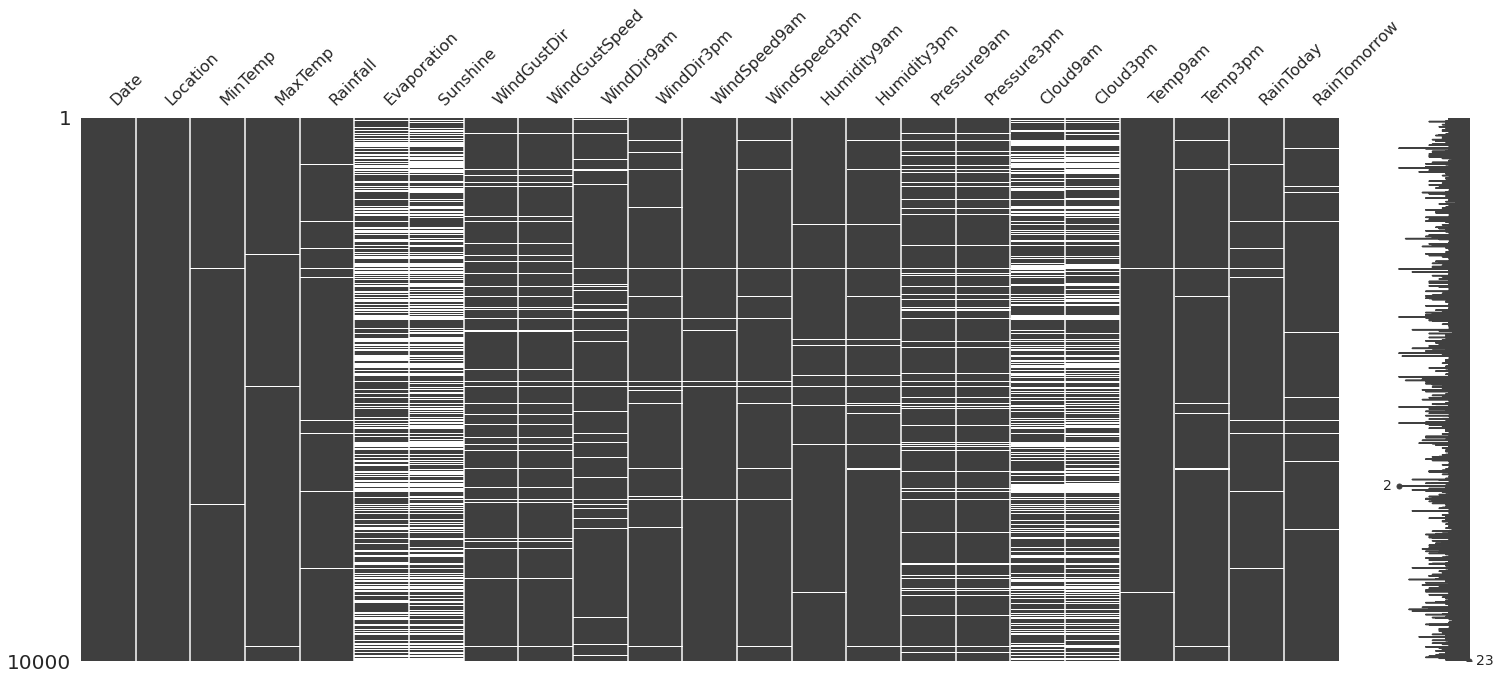

In [27]:
import missingno as msno
msno.matrix(tdf);

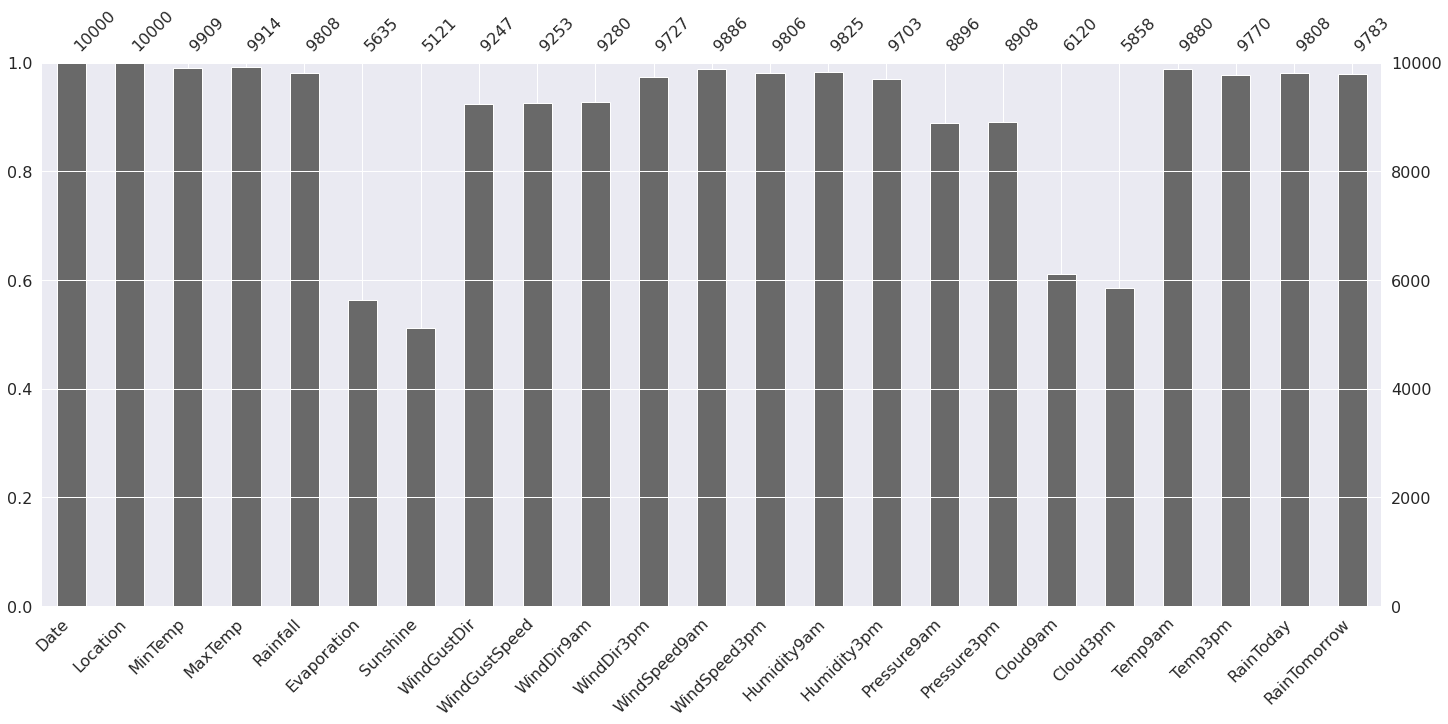

In [28]:
msno.bar(tdf);

In [29]:
missing_val = []
missing_val_rate = []
for i in tdf.columns:
    u = tdf[i].isnull().sum()
    r = (u/len(tdf)*100)
    missing_val.append(u)
    missing_val_rate.append(r)
    
y=pd.DataFrame( {"no of missing_val": missing_val,  "missing_val_rate": missing_val_rate},  index=tdf.columns)
y.sort_values("missing_val_rate", ascending=False)

,no of missing_val,missing_val_rate
Sunshine,4879,48.79
Evaporation,4365,43.65
Cloud3pm,4142,41.42
Cloud9am,3880,38.80
Pressure9am,1104,11.04
Pressure3pm,1092,10.92
WindGustDir,753,7.53
WindGustSpeed,747,7.47
WindDir9am,720,7.20
Humidity3pm,297,2.97


In [30]:
pd.DataFrame({"No. of unique values": list(tdf.nunique())}, index=tdf.columns)

,No. of unique values
Date,3045
Location,49
MinTemp,348
MaxTemp,410
Rainfall,259
Evaporation,172
Sunshine,142
WindGustDir,16
WindGustSpeed,54
WindDir9am,16


In [31]:
tdf.dropna(subset=['RainTomorrow','RainToday'], inplace = True)

In [32]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp            35
MaxTemp            33
Rainfall            0
Evaporation      4176
Sunshine         4698
WindGustDir       681
WindGustSpeed     677
WindDir9am        664
WindDir3pm        244
WindSpeed9am       78
WindSpeed3pm      168
Humidity9am       106
Humidity3pm       236
Pressure9am      1023
Pressure3pm      1014
Cloud9am         3682
Cloud3pm         3946
Temp9am            54
Temp3pm           172
RainToday           0
RainTomorrow        0
dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

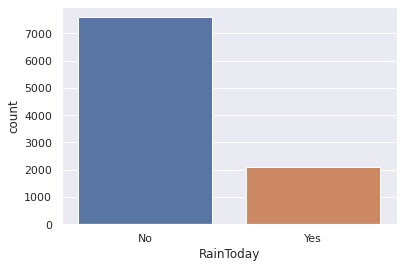

In [33]:
sns.countplot(x="RainToday",data=tdf)

In [34]:
 tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 69071 to 87275
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9705 non-null   object 
 1   Location       9705 non-null   object 
 2   MinTemp        9670 non-null   float64
 3   MaxTemp        9672 non-null   float64
 4   Rainfall       9705 non-null   float64
 5   Evaporation    5529 non-null   float64
 6   Sunshine       5007 non-null   float64
 7   WindGustDir    9024 non-null   object 
 8   WindGustSpeed  9028 non-null   float64
 9   WindDir9am     9041 non-null   object 
 10  WindDir3pm     9461 non-null   object 
 11  WindSpeed9am   9627 non-null   float64
 12  WindSpeed3pm   9537 non-null   float64
 13  Humidity9am    9599 non-null   float64
 14  Humidity3pm    9469 non-null   float64
 15  Pressure9am    8682 non-null   float64
 16  Pressure3pm    8691 non-null   float64
 17  Cloud9am       6023 non-null   float64
 18  Clo

In [35]:
print(tdf.shape)
print(tdf.ndim)
print(tdf.size)

(9705, 23)
2
223215


In [36]:
unique_val = []
for i in tdf.select_dtypes(include=['object']).columns:
    u = tdf[i].nunique()
    unique_val.append(u)
    
pd.DataFrame({"No. of unique values": unique_val}, index=tdf.select_dtypes(include=['object']).columns)

,No. of unique values
Date,3030
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [37]:
tdf_multi = tdf.copy()
tdf_multi = tdf_multi.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','Date'], axis=1)
tdf_multi = pd.get_dummies(tdf_multi, drop_first=True, columns = ['RainToday','RainTomorrow'], prefix = ['RainToday','RainTomorrow'])
tdf_multi.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
69071,12.4,15.9,1.0,3.8,0.3,48.0,30.0,19.0,68.0,81.0,1017.7,1015.1,7.0,8.0,14.9,14.8,0,1
98101,11.4,14.8,5.0,2.2,6.7,56.0,17.0,24.0,94.0,50.0,1010.8,1015.5,NaN,NaN,12.0,14.5,1,0
53616,5.7,6.3,13.4,NaN,NaN,70.0,37.0,24.0,96.0,96.0,NaN,NaN,NaN,NaN,5.9,6.2,1,1
19343,13.7,19.0,18.6,NaN,NaN,59.0,39.0,33.0,67.0,73.0,1019.3,1017.5,NaN,NaN,17.3,17.1,1,1
112269,8.5,17.0,10.6,NaN,NaN,28.0,15.0,19.0,62.0,65.0,1020.3,1019.7,NaN,NaN,14.5,16.2,1,0


In [38]:
tdf.isnull().sum()

Date                0
Location            0
MinTemp            35
MaxTemp            33
Rainfall            0
Evaporation      4176
Sunshine         4698
WindGustDir       681
WindGustSpeed     677
WindDir9am        664
WindDir3pm        244
WindSpeed9am       78
WindSpeed3pm      168
Humidity9am       106
Humidity3pm       236
Pressure9am      1023
Pressure3pm      1014
Cloud9am         3682
Cloud3pm         3946
Temp9am            54
Temp3pm           172
RainToday           0
RainTomorrow        0
dtype: int64

In [39]:
# DecisionTreeRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

index = tdf_multi.index
columns = tdf_multi.columns

imp_mean = IterativeImputer(random_state=0, estimator=DecisionTreeRegressor())
imp_mean.fit(tdf_multi)
tdf_multi_imputed = imp_mean.transform(tdf_multi)
tdf_multi_imputed

array([[12.4, 15.9,  1. , ..., 14.8,  0. ,  1. ],
       [11.4, 14.8,  5. , ..., 14.5,  1. ,  0. ],
       [ 5.7,  6.3, 13.4, ...,  6.2,  1. ,  1. ],
       ...,
       [11.7, 19.7,  0. , ..., 18.5,  0. ,  0. ],
       [11.1, 19.8,  0.4, ..., 17.9,  0. ,  0. ],
       [24.2, 30.7, 69.2, ..., 30.1,  1. ,  0. ]])

In [40]:
tdf_multi_imputed = pd.DataFrame(tdf_multi_imputed, index=index, columns=columns)
tdf_multi_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [41]:
tdf_multi_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 69071 to 87275
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           9705 non-null   float64
 1   MaxTemp           9705 non-null   float64
 2   Rainfall          9705 non-null   float64
 3   Evaporation       9705 non-null   float64
 4   Sunshine          9705 non-null   float64
 5   WindGustSpeed     9705 non-null   float64
 6   WindSpeed9am      9705 non-null   float64
 7   WindSpeed3pm      9705 non-null   float64
 8   Humidity9am       9705 non-null   float64
 9   Humidity3pm       9705 non-null   float64
 10  Pressure9am       9705 non-null   float64
 11  Pressure3pm       9705 non-null   float64
 12  Cloud9am          9705 non-null   float64
 13  Cloud3pm          9705 non-null   float64
 14  Temp9am           9705 non-null   float64
 15  Temp3pm           9705 non-null   float64
 16  RainToday_Yes     9705 non-null   flo

In [42]:
tdf_multi_imputed.isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

<AxesSubplot:xlabel='RainTomorrow_Yes', ylabel='count'>

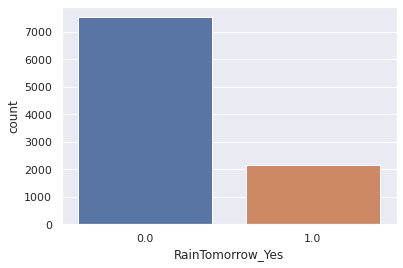

In [43]:
sns.countplot(x="RainTomorrow_Yes",data=tdf_multi_imputed)

# PREDICTION WITH CLASSIFICATION METHODS
# Preparation dependent and independent variables

In [44]:
tdf2 = tdf_multi_imputed.copy()
x_dat = tdf2.drop(['RainTomorrow_Yes'],axis=1)
y = tdf2["RainTomorrow_Yes"].values

# Normalization of variables

In [45]:
#If there is a outlier values, it must be done before coming here
x=(x_dat-np.min(x_dat))/(np.max(x_dat)-np.min(x_dat)).values  

# Test-Train splitting

In [46]:

from sklearn.model_selection import train_test_split,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_error,roc_curve,roc_auc_score,classification_report,r2_score,confusion_matrix

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# 1) logistic regression
# A ) Modeling of Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression() #default olanlar gelir.C var..
lr_model.fit(x_train,y_train)

LogisticRegression()

In [48]:
print(lr_model.intercept_)
print(lr_model.coef_)#Bu katsayilar denklemin katsayilari(ax+b.. gibi). mesela (-) olanlar ters yonde etkiliyor.

[-3.4817808]
[[-1.16466884  1.02953863  1.61355736 -0.22961791 -1.92618052  4.67351209
  -0.62703753 -0.81095669  0.35036169  4.72893156  0.52721311 -3.90917936
   0.116463    0.42597393  1.1368972   0.37836435  0.49454055]]


# B ) Prediction of Logistic Regression

In [49]:
y_pred=lr_model.predict(x_test)

In [50]:
y_pred[0:10]#tahminlerin ilk 10 degerini gorduk

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0.])

# C ) Accuracy Test(for default) of Logistic regression

In [51]:
accuracy_score(y_test,y_pred)

0.834478021978022

# Proba values - probability¶

In [52]:
y_probs = lr_model.predict_proba(x_test)[:,1]

In [53]:
y_probs

array([0.01506768, 0.80310127, 0.57259217, ..., 0.32622575, 0.13161728,
       0.52276577])

In [54]:

y_pred = [1 if i >0.65 else 0 for i in y_probs]
y_pred[:10]

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [55]:
log_score = accuracy_score(y_test,y_pred)
print ("log score=",log_score)

log score= 0.8324175824175825


In [56]:
confusion_matrix(y_test,y_pred)

array([[2211,   69],
       [ 419,  213]])

# D ) Model tuning of Logistic regression

In [57]:
lr_model = LogisticRegression(solver = "liblinear")
lr_model= lr_model.fit(x_train,y_train)
lr_model

LogisticRegression(solver='liblinear')

In [58]:
lr_model.predict(x_test)

array([0., 1., 1., ..., 0., 0., 1.])

In [59]:
accuracy_score(y_test, lr_model.predict(x_test))

0.8337912087912088

In [60]:
#Cross validation (10 katli ) yaparsak
lr_finalscore=cross_val_score(lr_model, x_test, y_test, cv = 10).mean()
lr_finalscore

0.837232264746034


# 2) Modeling of Gaussian Naive Bayes
  # A ) Modeling of NB


In [61]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)
nb_model

GaussianNB()

# B ) Prediction of NB

In [62]:
y_pred = nb_model.predict(x_test)
y_pred

array([0., 1., 1., ..., 1., 0., 1.])

# C ) Accuracy score of NB

In [63]:
accuracy_score(y_test,y_pred)

0.7894917582417582

In [64]:
confusion_matrix(y_test,y_pred)

array([[1900,  380],
       [ 233,  399]])

# D ) Model Tuning of NB

In [65]:
# 10 katli cross validation.
nb_finalscore=cross_val_score(nb_model, x_test, y_test, cv = 10).mean()
nb_finalscore

0.7736913336157792

# 3 ) KNN
  # A ) Modeling of KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(x_train, y_train)
knn_model

KNeighborsClassifier()

# B ) Prediction of KNN

In [67]:
y_pred = knn_model.predict(x_test)

# C ) Accuracy score of KNN

In [68]:
accuracy_score(y_test, y_pred)

0.8183379120879121

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      2280
         1.0       0.61      0.44      0.51       632

    accuracy                           0.82      2912
   macro avg       0.73      0.68      0.70      2912
weighted avg       0.80      0.82      0.81      2912



In [70]:
confusion_matrix(y_test,y_pred)

array([[2103,  177],
       [ 352,  280]])

# D ) Model Tuning of KNN

In [71]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [72]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [73]:
print("The best score:" + str(knn_cv.best_score_))
print("The best parameters: " + str(knn_cv.best_params_))

The best score:0.8421863900199253
The best parameters: {'n_neighbors': 45}


In [74]:
knn = KNeighborsClassifier(3)  #we choose 3 neigboors. I think 1 is not good 
knn_tuned = knn.fit(x_train, y_train)

In [75]:
knn_finalscore=knn_tuned.score(x_test, y_test)
knn_finalscore

0.8104395604395604

# 4 )SVC
  # A ) Modeling of SVC

In [76]:
from sklearn.svm import SVC
svm_model = SVC().fit(x_train,y_train)#we choose default c:1,kernel:'rbf',dagree:3...
#?svm_model

# B ) Prediction of SVC

In [77]:
y_pred = svm_model.predict(x_test)

# C ) Accuracy score of SVC

In [78]:
accuracy_score(y_test,y_pred)

0.84375

# D ) Model Tuning of SVC
   # For kernel:rbf

In [79]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "rbf")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1,        
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   41.4s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [80]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 9}


In [81]:
svc_tuned1 = SVC(kernel = "rbf", C = 6).fit(x_train, y_train)

y_pred = svc_tuned1.predict(x_test)
accuracy_score(y_test, y_pred)

0.8413461538461539

# For kernel:linear

In [82]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   23.3s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [83]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 2}


In [84]:
svc_tuned2 = SVC(kernel = "linear", C = 9).fit(x_train, y_train)
y_pred = svc_tuned2.predict(x_test)
accuracy_score(y_test, y_pred)

0.8337912087912088

# For kernel:rbf , C and gamma

In [85]:
svc_model = SVC(kernel = "rbf").fit(x_train, y_train)

In [86]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [87]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [88]:
print("The best parameters: " + str(svc_cv_model.best_params_))

The best parameters: {'C': 10, 'gamma': 1}


In [89]:
svc_tuned3 = SVC(C = 100, gamma =0.001).fit(x_train, y_train)
y_pred = svc_tuned3.predict(x_test)
svc_finalscore=accuracy_score(y_test, y_pred)
svc_finalscore

0.8382554945054945

# 5) Random Forests

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

# Prediction of Random Forests

In [93]:
y_pred = rf_model.predict(x_test)

# Accuracy score of Random Forests

In [95]:
rf_score=accuracy_score(y_test,y_pred)
rf_score

0.8464972527472527

In [96]:
c_rf=confusion_matrix(y_test,y_pred)
c_rf

array([[2152,  128],
       [ 319,  313]])

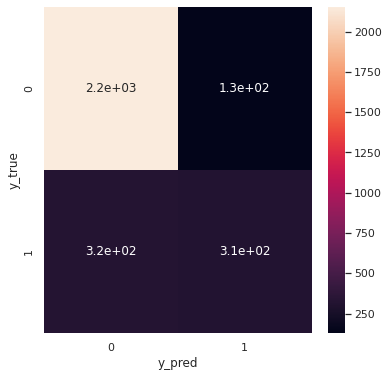

In [98]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=rf_model.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# CLASSIFICATION REPORT: 

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      2280
         1.0       0.71      0.50      0.58       632

    accuracy                           0.85      2912
   macro avg       0.79      0.72      0.74      2912
weighted avg       0.84      0.85      0.84      2912



In [100]:
rf_model.predict(x_test)[0:10] #ilk 10 datatest deki tahminlerimiz

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.])

In [101]:
rf_model.predict_proba(x_test)[0:10] #1.si 0 olma 2.si 1 olma olasiligi oranlari


array([[0.9 , 0.1 ],
       [0.45, 0.55],
       [0.7 , 0.3 ],
       [0.9 , 0.1 ],
       [0.69, 0.31],
       [0.16, 0.84],
       [0.59, 0.41],
       [0.66, 0.34],
       [0.84, 0.16],
       [0.99, 0.01]])

# TUNING THE PREDICTION: WE can tune our prediction
n_estimators,importance variables,

n_estimators= 1 --> Accuracy: 75.82417582417582 %
n_estimators= 2 --> Accuracy: 80.80357142857143 %
n_estimators= 3 --> Accuracy: 80.04807692307693 %
n_estimators= 4 --> Accuracy: 81.83379120879121 %
n_estimators= 5 --> Accuracy: 81.90247252747253 %
n_estimators= 6 --> Accuracy: 82.76098901098901 %
n_estimators= 7 --> Accuracy: 82.48626373626374 %
n_estimators= 8 --> Accuracy: 83.31043956043956 %
n_estimators= 9 --> Accuracy: 82.76098901098901 %
n_estimators= 10 --> Accuracy: 83.24175824175825 %
n_estimators= 11 --> Accuracy: 83.1043956043956 %
n_estimators= 12 --> Accuracy: 83.41346153846155 %
n_estimators= 13 --> Accuracy: 83.41346153846155 %
n_estimators= 14 --> Accuracy: 83.99725274725274 %
n_estimators= 15 --> Accuracy: 83.48214285714286 %
n_estimators= 16 --> Accuracy: 83.72252747252747 %
n_estimators= 17 --> Accuracy: 83.96291208791209 %
n_estimators= 18 --> Accuracy: 83.92857142857143 %
n_estimators= 19 --> Accuracy: 83.68818681318682 %
n_estimators= 20 --> Accuracy: 83.6881868

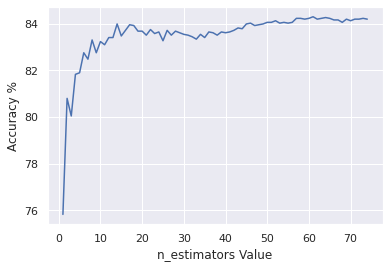

In [102]:
from sklearn.ensemble import RandomForestClassifier  #n_estimotors=11 is best
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(x_train, y_train)
    score_list.append(100*rf2.score(x_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(x_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

# Lets look at importance of variables

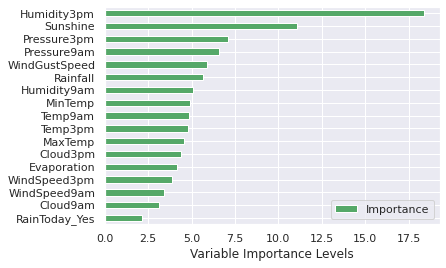

In [106]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Variable Importance Levels");

In [107]:
y_pred = rf2.predict(x_test)
rf_finalscore=accuracy_score(y_test, y_pred)
rf_finalscore

0.842032967032967

# 6) DECISION TREE METHOD

In [176]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [177]:
y_pred = dtc.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [178]:
dtc_score=accuracy_score(y_test,y_pred)
dtc_score

0.7781593406593407

In [179]:
c_dtc=confusion_matrix(y_test,y_pred)
c_dtc

array([[1946,  334],
       [ 312,  320]])

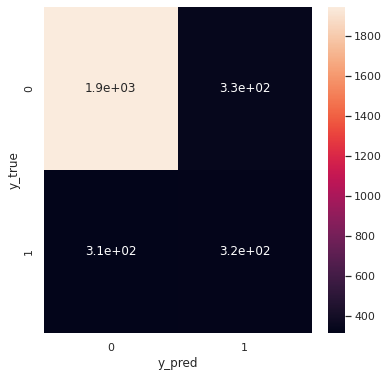

In [180]:
from sklearn.metrics import confusion_matrix   #Hepsi icin yapilabilir
y_true=y_test
y_pred=dtc.predict(x_test)
cmdtc=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmdtc, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      2280
         1.0       0.49      0.51      0.50       632

    accuracy                           0.78      2912
   macro avg       0.68      0.68      0.68      2912
weighted avg       0.78      0.78      0.78      2912



# Decision Tree Model tuning

In [182]:
tree_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [183]:
tree1 = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree1, tree_grid, cv = 10, n_jobs = -1, verbose = 2)
tree_cv_model = tree_cv.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 2580 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   53.0s finished


In [184]:
print("Best Parameters: " + str(tree_cv_model.best_params_))

Best Parameters: {'max_depth': 5, 'min_samples_split': 23}


In [185]:
tree1 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 23)
tree_tuned1 = tree1.fit(x_train, y_train)

In [186]:
y_pred = tree_tuned1.predict(x_test)
dtc_finalscore=accuracy_score(y_test, y_pred)
dtc_finalscore

0.8282967032967034

In [187]:
c_dtc2=confusion_matrix(y_test,y_pred)
c_dtc2

array([[1946,  334],
       [ 312,  320]])

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86      2280
         1.0       0.49      0.51      0.50       632

    accuracy                           0.78      2912
   macro avg       0.68      0.68      0.68      2912
weighted avg       0.78      0.78      0.78      2912



# 7) Gradient Boosting Machines

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

In [191]:
y_pred = gbm_model.predict(x_test)

In [192]:
accuracy_score(y_test, y_pred)

0.8392857142857143

- Model Tuning of GBM

In [193]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 10,
                                min_samples_split = 10,
                                n_estimators = 100)

In [194]:
gbm_tuned =  gbm.fit(x_train,y_train)

In [195]:
y_pred = gbm_tuned.predict(x_test)
gbm_finalscore=accuracy_score(y_test,y_pred)
gbm_finalscore

0.8389423076923077

In [197]:
c_gbm=confusion_matrix(y_test,y_pred)
c_gbm

array([[2132,  148],
       [ 320,  312]])

In [198]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      2280
         1.0       0.68      0.49      0.57       632

    accuracy                           0.84      2912
   macro avg       0.77      0.71      0.74      2912
weighted avg       0.83      0.84      0.83      2912



# 8 ) XGBoost

In [140]:
!pip install xgboost

In [206]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(x_train, y_train)

[14:14:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [205]:
y_pred = xgb_model.predict(x_test)

In [207]:
accuracy_score(y_test, y_pred)

0.8396291208791209

- Model Tuning of XGBoost

In [208]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    n_estimators = 100,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(x_train,y_train)
y_pred = xgb_tuned.predict(x_test)
XGBoost_finalscore=accuracy_score(y_test, y_pred)
XGBoost_finalscore

[14:14:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.84375

In [209]:
c_xgb=confusion_matrix(y_test,y_pred)
c_xgb

array([[2156,  124],
       [ 331,  301]])

In [210]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90      2280
         1.0       0.71      0.48      0.57       632

    accuracy                           0.84      2912
   macro avg       0.79      0.71      0.74      2912
weighted avg       0.83      0.84      0.83      2912



# 9 ) LightGBM

In [148]:
!conda install -c conda-forge lightgbm


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/linux-64'




In [211]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier().fit(x_train, y_train)

In [212]:
y_pred = lgbm_model.predict(x_test)

In [213]:
accuracy_score(y_test, y_pred)

0.8427197802197802

- Model Tuning of LightGBM

In [214]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [215]:
lgbm = LGBMClassifier(learning_rate = 0.1, 
                       max_depth = 4,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(x_train,y_train)

In [216]:
y_pred = lgbm_tuned.predict(x_test)
lgbm_finalscore=accuracy_score(y_test, y_pred)
lgbm_finalscore

0.8440934065934066

In [217]:
c_lgbm=confusion_matrix(y_test,y_pred)
c_lgbm

array([[2122,  158],
       [ 296,  336]])

In [218]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      2280
         1.0       0.68      0.53      0.60       632

    accuracy                           0.84      2912
   macro avg       0.78      0.73      0.75      2912
weighted avg       0.83      0.84      0.84      2912



In [219]:
print(lr_finalscore,nb_finalscore,knn_finalscore,svc_finalscore, rf_finalscore, dtc_finalscore, gbm_finalscore, XGBoost_finalscore, lgbm_finalscore)

0.837232264746034 0.7736913336157792 0.8104395604395604 0.8382554945054945 0.842032967032967 0.8282967032967034 0.8389423076923077 0.84375 0.8440934065934066


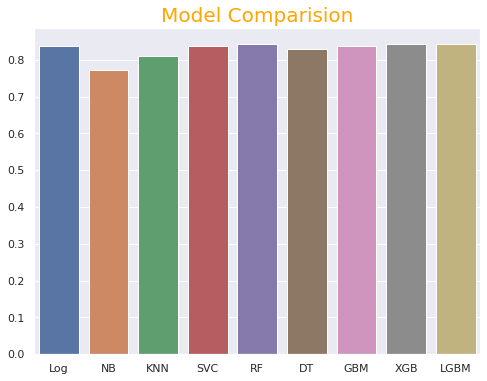

In [220]:

indexx = ["Log","NB","KNN","SVC", "RF", "DT", "GBM", "XGB", "LGBM"]
regressions = [lr_finalscore,nb_finalscore,knn_finalscore,svc_finalscore, rf_finalscore, dtc_finalscore, gbm_finalscore, XGBoost_finalscore, lgbm_finalscore]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx,y=regressions)
plt.xticks()
plt.title('Model Comparision',color = 'orange',fontsize=20);

